## Load modules

In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction import DictVectorizer
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
import xgboost as xgb


## Exploratory Data Analysis

In [342]:
df = pd.read_csv('./data/WineQT.csv')

In [343]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


1. **Dataset size**:
   - 1,143 samples (rows) and 13 columns.
   - Small but sufficient dataset for exploratory analysis and modeling.

2. **Missing values**:
   - All columns have 1,143 non-null values → **no missing data**.
   - High-quality dataset with no need for imputation.

3. **Data types**:
   - 11 columns of type `float64` — continuous physicochemical features (e.g., acidity, pH, alcohol content).
   - 2 columns of type `int64`:
     - `quality` — target variable (wine quality score).
     - `Id` — likely a unique identifier for each wine sample (can be dropped before modeling).
   - **All features (except Id) are numerical and continuous** → no categorical variables, **no encoding required**.

4. **Target variable**:
   - `quality` is of type `int64` and fully populated.
   - Represents wine quality rating (typically on a scale from 3 to 8 or 9).
   - Suitable for **regression** (predicting a continuous-like score) or classification — in this project, we treat it as regression.

In [344]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [345]:
# don't need the Id column
df = df.drop('Id', axis=1)

In [346]:
# lets use same columnnames formatting: snake_case, lowercase
df.columns = df.columns.str.lower().str.replace(' ', '_')

In [347]:
# Final preview of cleaned dataframe
df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


### Missing values

In [348]:
# Check for missing values
df.isna().sum()

fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
ph                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

Nice, has no missing values

### Summary Statistics

In [349]:
df.describe() 

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol,quality
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


### Understanding Target Variable

In [350]:
df.quality.unique() 

array([5, 6, 7, 4, 8, 3])

In [351]:
df.quality.value_counts()

quality
5    483
6    462
7    143
4     33
8     16
3      6
Name: count, dtype: int64

**Strong class imbalance**: 82.7% of wines are rated average (5–6), which is typical for the Wine Quality dataset.

**Most common ratings**: Quality 5 and 6 dominate (483 + 462 samples), making the mode = 6.

**Rare extremes**: Only 1.9% of samples are high-quality (7–8), and 3.4% are low-quality (3–4). This creates a challenge for accurately predicting outstanding or poor wines.

**Ordinal scale**: Values range from 3 to 8 (no 9 observed in this subset), confirming suitability for regression (predicting a score) while acknowledging classification-like behavior due to discrete integers.

### Numeric features: distributions

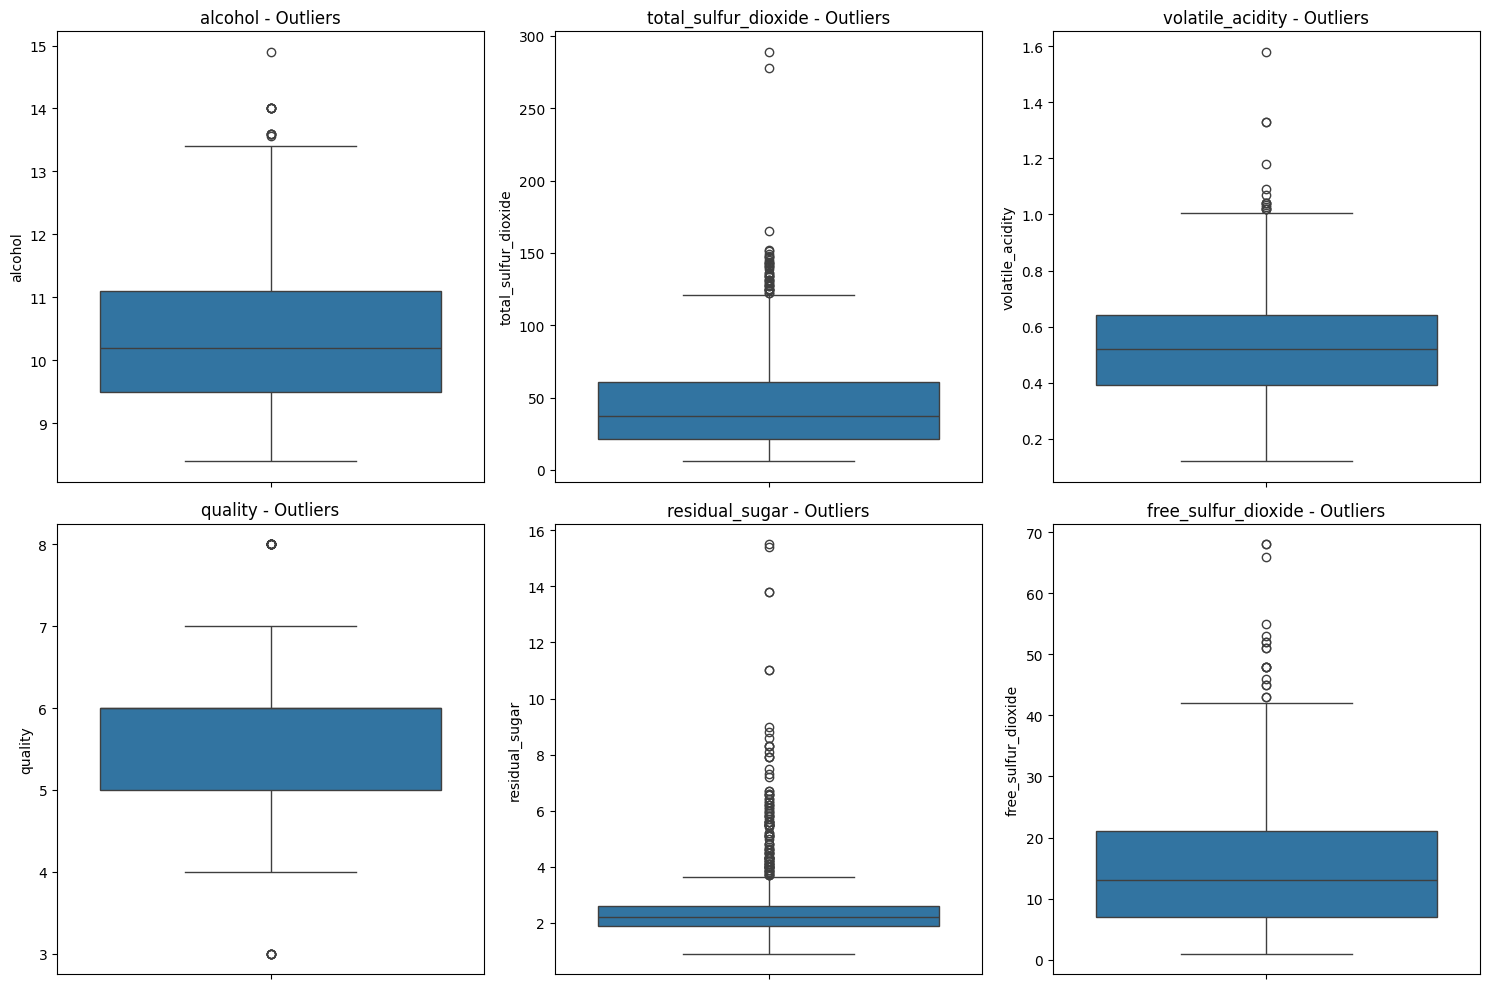

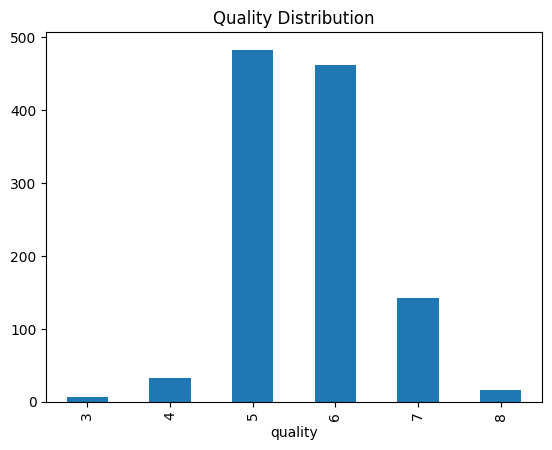

In [352]:
# Quick visualizations to confirm insights
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
features = ['alcohol', 'total_sulfur_dioxide', 'volatile_acidity', 'quality', 'residual_sugar', 'free_sulfur_dioxide']
for i, feat in enumerate(features):

    sns.boxplot(y=df[feat], ax=axes[i//3, i%3])
    axes[i//3, i%3].set_title(f'{feat} - Outliers')
plt.tight_layout()
plt.show()

# Target distribution
df['quality'].value_counts().sort_index().plot(kind='bar')
plt.title('Quality Distribution')
plt.show()

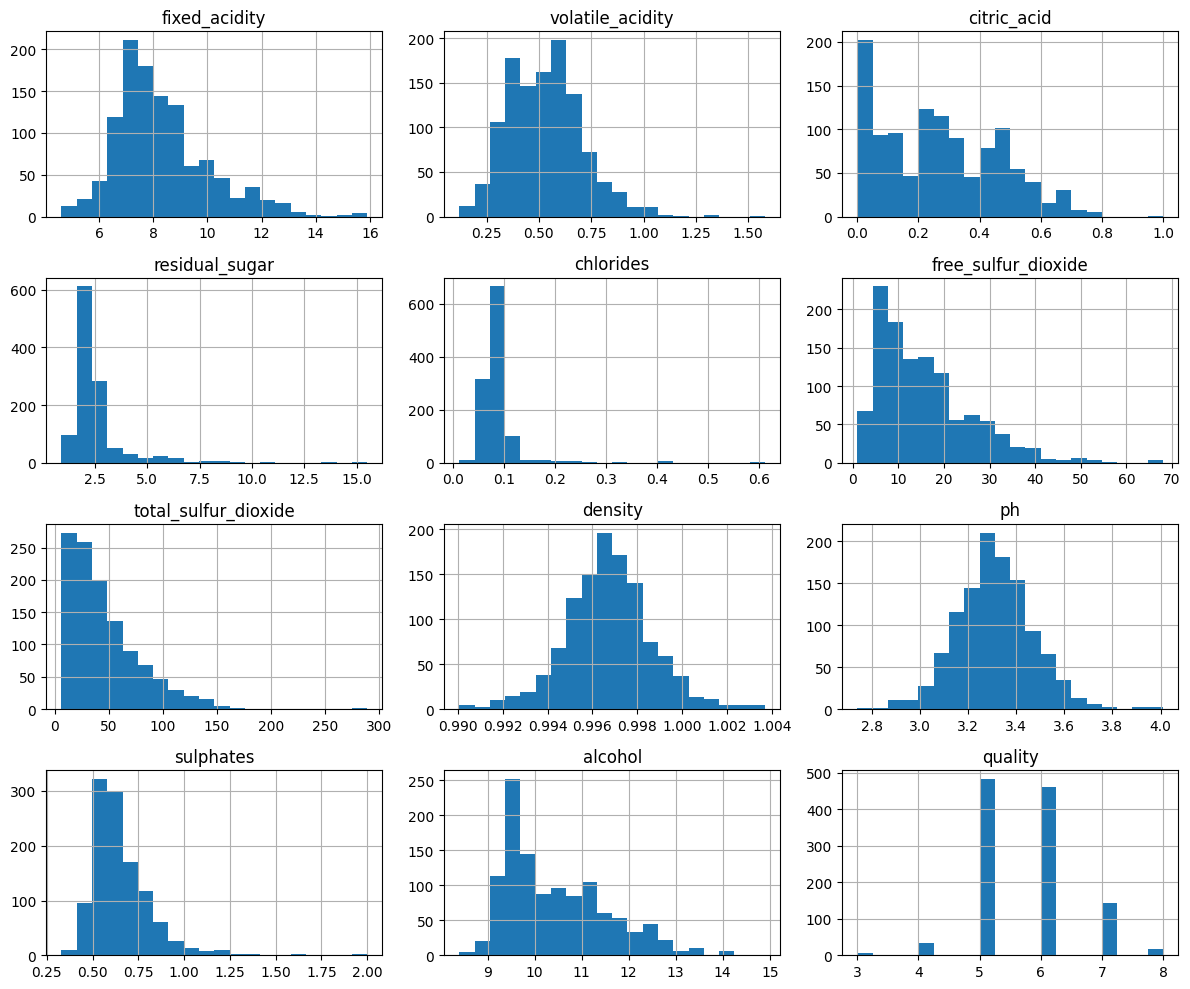

In [353]:
# Histograms for all features
df.hist(figsize=(12, 10), bins=20)
plt.tight_layout()
plt.show()

### Numeric correlation heatmap

In [354]:
numeric_cols = df.columns.tolist()
numeric_cols

['fixed_acidity',
 'volatile_acidity',
 'citric_acid',
 'residual_sugar',
 'chlorides',
 'free_sulfur_dioxide',
 'total_sulfur_dioxide',
 'density',
 'ph',
 'sulphates',
 'alcohol',
 'quality']

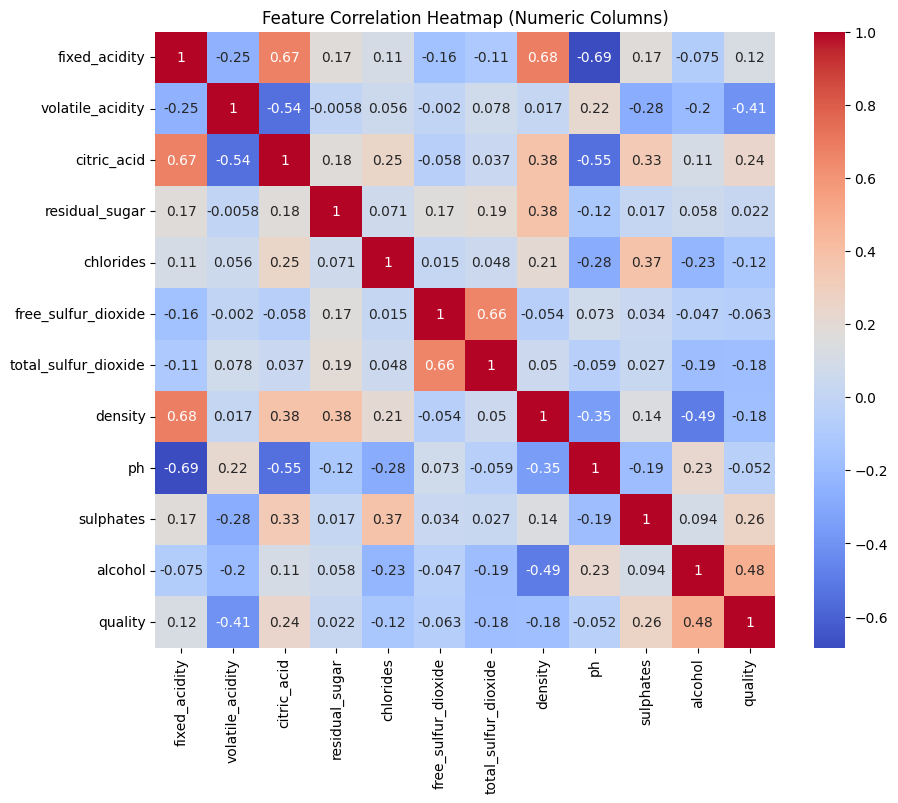

In [355]:
numeric_cols = df.select_dtypes(include=[np.number]).columns
corr_matrix = df[numeric_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Feature Correlation Heatmap (Numeric Columns)")
plt.show()

In [356]:
# check the correlation with the target variable
target_corr = df.corr()['quality'].sort_values(ascending=False)
target_corr

quality                 1.000000
alcohol                 0.484866
sulphates               0.257710
citric_acid             0.240821
fixed_acidity           0.121970
residual_sugar          0.022002
ph                     -0.052453
free_sulfur_dioxide    -0.063260
chlorides              -0.124085
density                -0.175208
total_sulfur_dioxide   -0.183339
volatile_acidity       -0.407394
Name: quality, dtype: float64

**Top predictors of wine quality** (absolute correlation > 0.2):  
1. **alcohol** (+0.48)  
2. **volatile acidity** (-0.41)  
3. **sulphates** (+0.26)  
4. **citric acid** (+0.24)

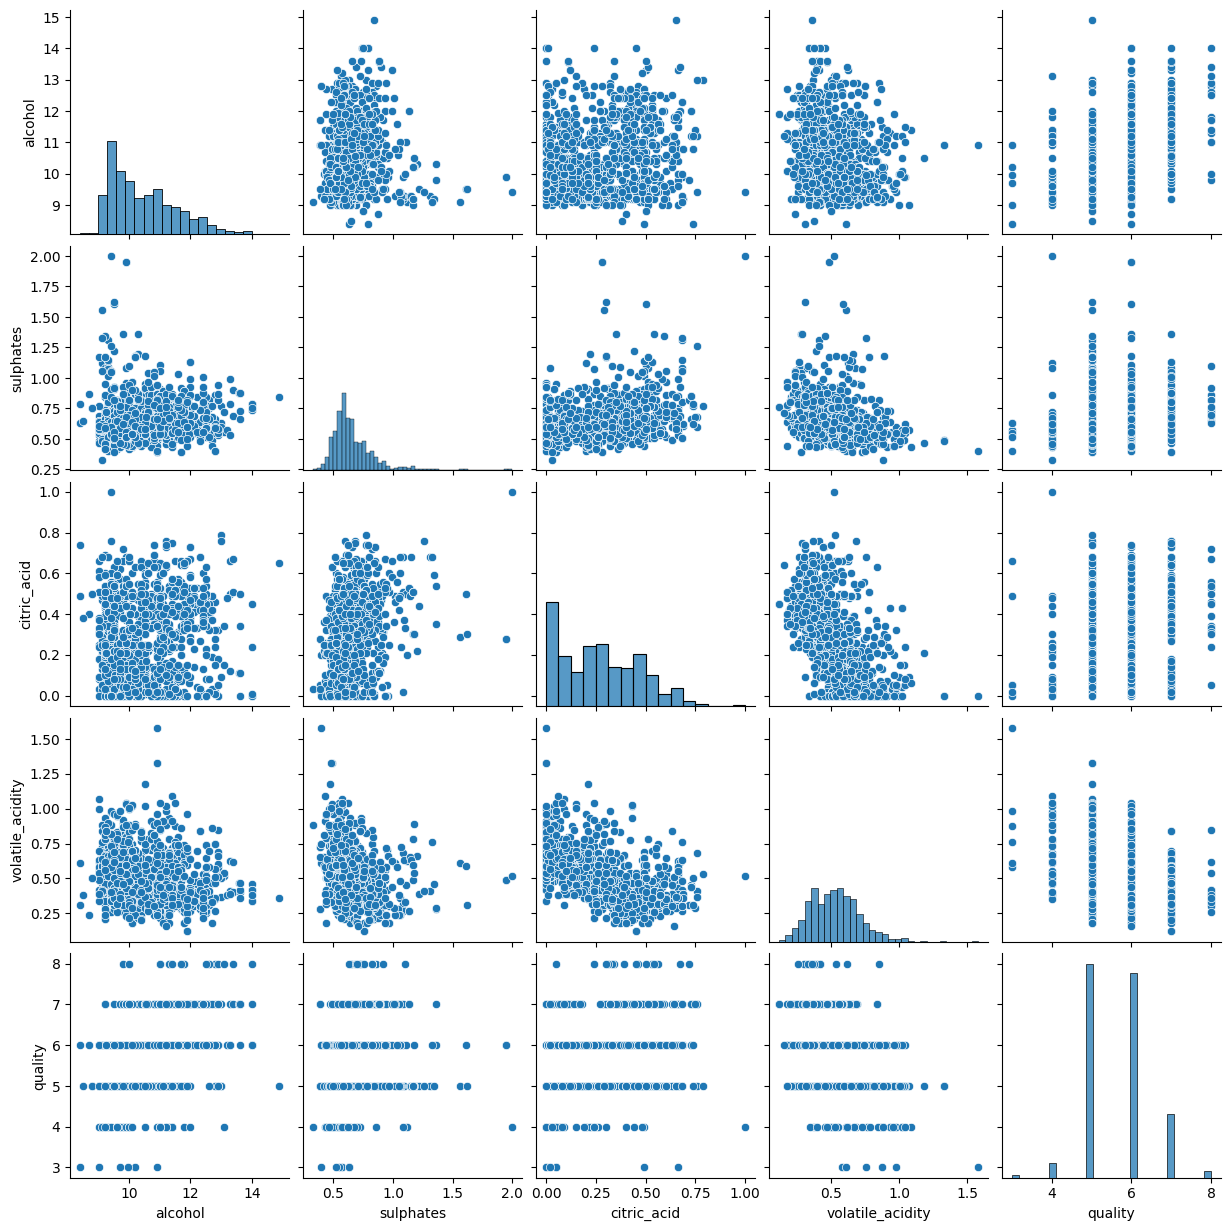

In [357]:
# # Pairplot for key features (subset to avoid overload)
sns.pairplot(df[['alcohol', 'sulphates', 'citric_acid', 'volatile_acidity', 'quality']])
plt.show()

**Notable Multicollinearity Between Features**

| Feature Pair                             | Correlation | Insight |
|------------------------------------------|-------------|---------|
| fixed acidity ↔ density                  | +0.68       | Strong: Acids increase wine density. |
| fixed acidity ↔ citric acid              | +0.67       | Strong: Both are components of total acidity. |
| fixed acidity ↔ pH                       | -0.69       | Strong negative: More fixed acid → lower pH. |
| free sulfur dioxide ↔ total sulfur dioxide | +0.66     | Expected: Free SO₂ is a subset of total. |
| density ↔ alcohol                        | -0.49       | Moderate negative: Alcohol reduces density. |
| volatile acidity ↔ citric acid           | -0.54       | Moderate negative: Trade-off in acid profile. |
| citric acid ↔ pH                         | -0.55       | Moderate negative: Citric acid lowers pH. |

**Implication**: High multicollinearity is chemically logical. Tree-based models (XGBoost, Random Forest) handle it well.

### Model-based feature importance (RandomForestRegressor)

#### Feature engineering

In [358]:
df['total_acidity'] = df['fixed_acidity'] + df['volatile_acidity'] + df['citric_acid']
df['good_acid_ratio'] = df['citric_acid'] / (df['volatile_acidity'] + 0.01)
df['alcohol_sulphate'] = df['alcohol'] * df['sulphates']

,feature,importance
1,alcohol_sulphate,0.259045
0,alcohol,0.147847
13,volatile_acidity,0.103974
12,total_sulfur_dioxide,0.071526
2,chlorides,0.057420
8,ph,0.053500
4,density,0.049313
7,good_acid_ratio,0.045522
9,residual_sugar,0.039946
10,sulphates,0.038758


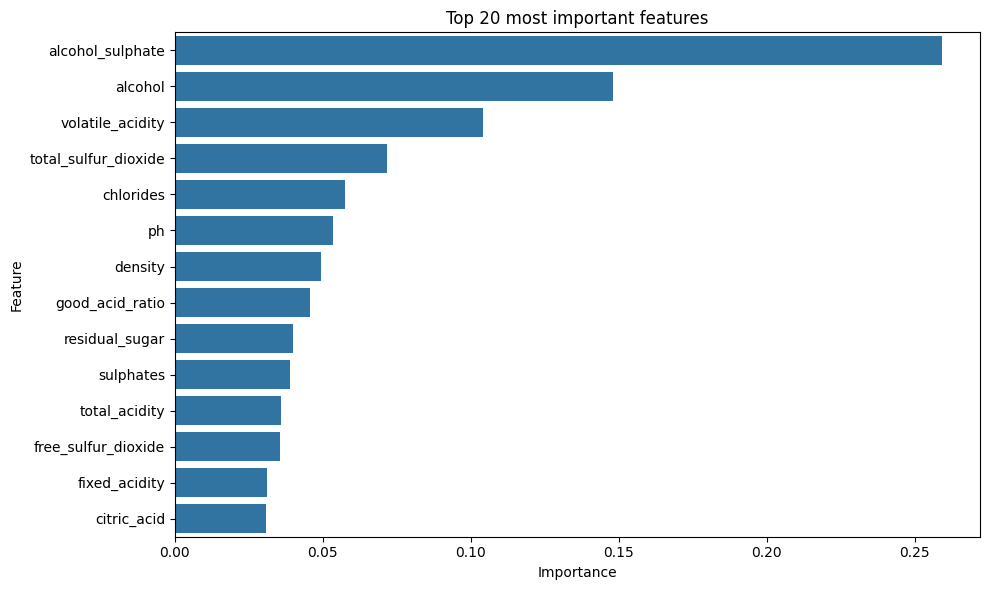

In [359]:
df_eda = df.copy()

# Target: log-transformed salary to reduce skewness
y_eda = np.log1p(df_eda["quality"].values)

# Drop obvious non-feature columns if needed (adjust as necessary)
drop_cols = ["quality", "target"]
feature_df = df_eda.drop(columns=drop_cols, errors="ignore")

# Convert to dicts for DictVectorizer (handles numeric + categorical together)
dicts_eda = feature_df.to_dict(orient="records")

dv_eda = DictVectorizer(sparse=False)
X_eda = dv_eda.fit_transform(dicts_eda)

rf_eda = RandomForestRegressor(
    n_estimators=100,
    random_state=1,
    n_jobs=-1
)
rf_eda.fit(X_eda, y_eda)

importances = rf_eda.feature_importances_
feature_names = dv_eda.get_feature_names_out()

fi_df = (
    pd.DataFrame({"feature": feature_names, "importance": importances})
    .sort_values("importance", ascending=False)
    .head(20)
)

display(fi_df)

plt.figure(figsize=(10, 6))
sns.barplot(data=fi_df, x="importance", y="feature")
plt.title("Top 20 most important features")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


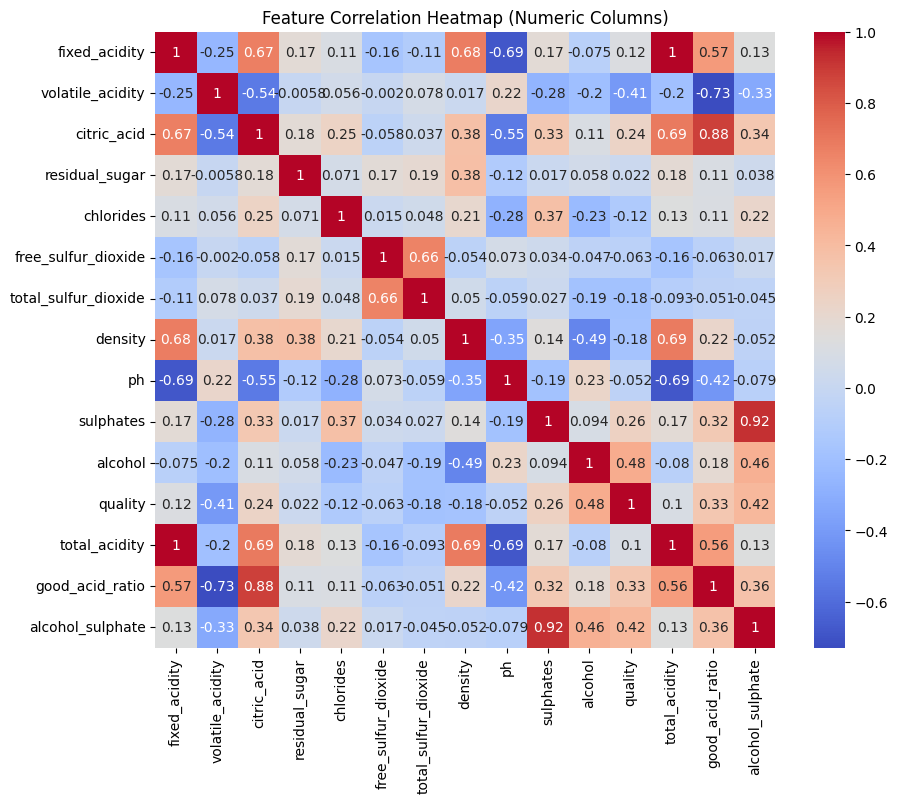

In [360]:
numeric_cols = df.select_dtypes(include=[np.number]).columns
corr_matrix = df[numeric_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Feature Correlation Heatmap (Numeric Columns)")
plt.show()

In [361]:
target_corr_v2 = df.corr()['quality'].sort_values(ascending=False)
target_corr_v2

quality                 1.000000
alcohol                 0.484866
alcohol_sulphate        0.421844
good_acid_ratio         0.334493
sulphates               0.257710
citric_acid             0.240821
fixed_acidity           0.121970
total_acidity           0.101720
residual_sugar          0.022002
ph                     -0.052453
free_sulfur_dioxide    -0.063260
chlorides              -0.124085
density                -0.175208
total_sulfur_dioxide   -0.183339
volatile_acidity       -0.407394
Name: quality, dtype: float64


### General Conclusions: Exploratory Data Analysis (EDA)

#### Dataset Overview
- **Source**: White Wine Quality dataset (UCI/Kaggle variant).
- **Size**: 1,143 samples, 13 columns (including `Id` and target `quality`).
- **Data Quality**: Excellent — **no missing values**, all features numerical (11 float64, 2 int64).
- **Irrelevant column**: `Id` — should be dropped before modeling.

#### Target Variable (`quality`)
- Ordinal scale: 3–8 (integer ratings).
- **Strong imbalance**: 
  - 82.7% of wines rated **average** (5–6).
  - Only ~14% high quality (7–8), ~3% low (3–4).
- Mean = 5.66, Median = 6 → slightly left-skewed.
- **Implication**: Models may bias toward predicting 5–6. Regression (RMSE) is suitable, but rare extremes (3 and 8) are harder to predict accurately.

#### Feature Distributions & Issues
- Features represent physicochemical properties (acidity, sugar, alcohol, etc.).
- **Skewed distributions**: Residual sugar, chlorides, sulfur dioxides — right-skewed with potential outliers.
- **Outliers detected**: Especially in `total sulfur dioxide` (max 289), `free sulfur dioxide`, `residual sugar`, and some acidity measures.
- **Recommendation**: Investigate with boxplots; consider winsorizing or capping at 95–99th percentile.

#### Correlation Insights
- **Strongest positive predictors** of quality:
  1. **alcohol** (+0.48) — highest impact.
  2. **sulphates** (+0.26).
  3. **citric acid** (+0.24).
- **Strongest negative predictor**:
  - **volatile acidity** (-0.41) — most harmful (vinegar-like off-flavors).
- Many features show weak linear correlation (< |0.2|) with quality but may contribute via interactions.
- **High multicollinearity** (e.g., fixed acidity ↔ density +0.68, fixed acidity ↔ pH -0.69) — chemically logical and not problematic for tree-based models.

#### Key Takeaways & Business Insights
- Wine quality is primarily driven by **higher alcohol**, **lower volatile acidity**, and balanced **sulphates/citric acid**.
- Results align with domain knowledge: cleaner fermentation and higher alcohol content lead to better ratings.
- The dataset reflects real-world wine production: most wines are average quality, with few outstanding or poor ones.

## Modeling

### Preparation for training models

In [362]:
df['target'] = np.log1p(df.quality)
df.drop(columns=['quality'], inplace=True)
df.dtypes

fixed_acidity           float64
volatile_acidity        float64
citric_acid             float64
residual_sugar          float64
chlorides               float64
free_sulfur_dioxide     float64
total_sulfur_dioxide    float64
density                 float64
ph                      float64
sulphates               float64
alcohol                 float64
total_acidity           float64
good_acid_ratio         float64
alcohol_sulphate        float64
target                  float64
dtype: object

In [363]:
# split the train dataset

df_train_full, df_train_test = train_test_split(df, test_size=0.2, random_state=11)
df_train_train, df_train_val = train_test_split(df_train_full, test_size=0.25,random_state=11)

y_train = df_train_train.target.values
y_val = df_train_val.target.values
y_test = df_train_test.target.values

In [364]:
# reset index
df_train_train = df_train_train.reset_index(drop=True)
df_train_val = df_train_val.reset_index(drop=True)
df_train_test = df_train_test.reset_index(drop=True)

# delete target value
del df_train_train["target"]
del df_train_val["target"]
del df_train_test["target"]

In [365]:
# fill nan with 0
df_train_train = df_train_train.fillna(0)
df_train_val = df_train_val.fillna(0)
df_train_test = df_train_test.fillna(0)

In [366]:
# change the dataframe to dictionary
dict_train = df_train_train.to_dict(orient="records")
dict_val = df_train_val.to_dict(orient="records")
dict_test = df_train_test.to_dict(orient="records")

In [367]:
# feature matrix
dv = DictVectorizer(sparse=True)
X_train = dv.fit_transform(dict_train)
X_val = dv.transform(dict_val)
X_test = dv.transform(dict_test)

print("Number of features:", len(dv.feature_names_))

Number of features: 14


### Training Models

In [ ]:
# Function to evaluate models
def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    return rmse, r2, model

#### Linear Regression

In [369]:
lr = LinearRegression()
rmse_lin, r2_lin, lr_model = evaluate_model(lr, X_train, X_test, y_train, y_test)

print("Linear Regression RMSE:", rmse_lin)
print("Linear Regression R2:", r2_lin)

Linear Regression RMSE: 0.09298944331589179
Linear Regression R2: 0.40571961735532924


#### Decision Tree Regressor

In [370]:
dt1 = DecisionTreeRegressor(max_depth=1, random_state=11)
rmse_dt1, r2_dt1, lr_model = evaluate_model(dt1, X_train, X_test, y_train, y_test)

print("Decision Tree (depth=1) RMSE:", rmse_dt1)
print("Decision Tree (depth=1) R2:", r2_dt1)

Decision Tree (depth=1) RMSE: 0.10805588151749455
Decision Tree (depth=1) R2: 0.19754457023751515


#### Random Forest

In [371]:
# Random Forest
rf = RandomForestRegressor(random_state=42)
rmse_rf, r2_rf, rf_model = evaluate_model(rf, X_train, X_test, y_train, y_test)

print("Random Forest RMSE:", rmse_rf)
print("Random Forest R2:", r2_rf)

Random Forest RMSE: 0.08972386787121509
Random Forest R2: 0.44672624064236355


#### XGBoost 

In [372]:
xgb = xgb.XGBRegressor(
    max_depth=8,
    learning_rate=0.1,
    n_estimators=300,
    subsample=0.9,
    colsample_bytree=0.9,
    random_state=11
)

rmse_xgb, r2_xgb, xgb_model = evaluate_model(xgb, X_train, X_test, y_train, y_test)

print("XGBoost RMSE:", rmse_xgb)
print("XGBoost R2:", r2_xgb)

XGBoost RMSE: 0.09182570709498447
XGBoost R2: 0.4205010395117478


#### Compare models

In [373]:
# Combined performance table
performance_df = pd.DataFrame({
    "Model": ["Linear", "Decision Tree", "Random Forest", "XGBoost"],
    "RMSE": [rmse_lin, rmse_dt1, rmse_rf, rmse_xgb],
    "R2": [r2_lin, r2_dt1, r2_rf, r2_xgb]
})

performance_df

,Model,RMSE,R2
0,Linear,0.092989,0.405720
1,Decision Tree,0.108056,0.197545
2,Random Forest,0.089724,0.446726
3,XGBoost,0.091826,0.420501


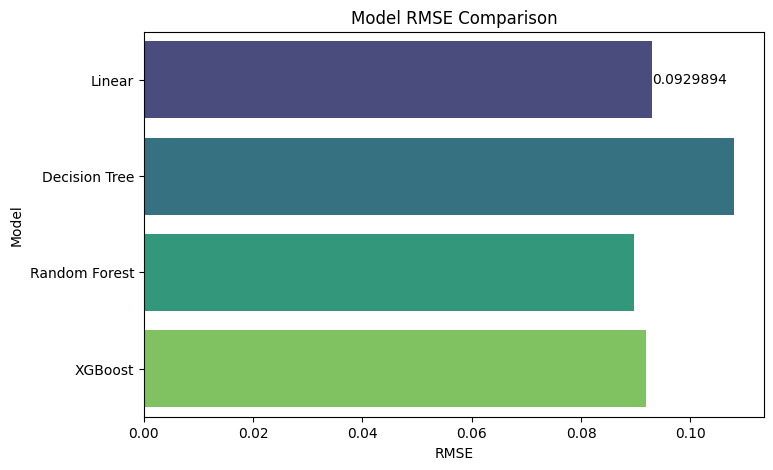

In [374]:
plt.figure(figsize=(8,5))
ax = sns.barplot(
    data=performance_df,
    x="RMSE",
    y="Model",
    hue="Model",
    palette="viridis",
    legend=False
)
ax.bar_label(ax.containers[0])
plt.title("Model RMSE Comparison")
plt.show()

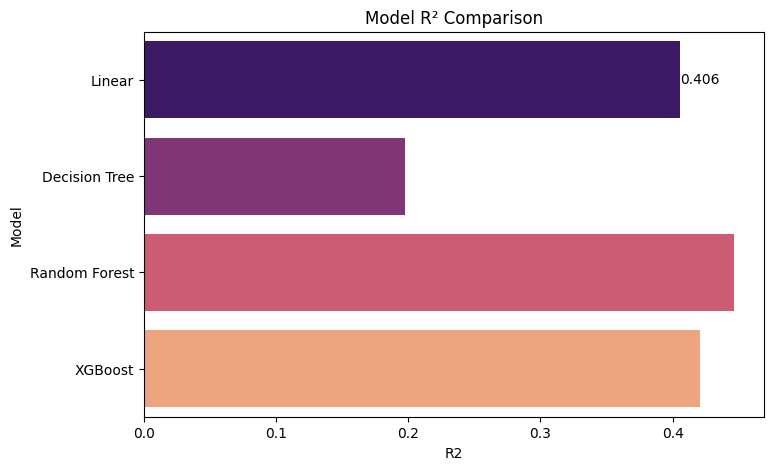

In [375]:
plt.figure(figsize=(8,5))
ax = sns.barplot(
    data=performance_df,
    x="R2",
    y="Model",
    hue="Model",
    palette="magma",
    legend=False
)
ax.bar_label(ax.containers[0], fmt="%.3f")
plt.title("Model R² Comparison")
plt.show()

**Current Best Model: Random Forest**

Random Forest currently achieves the lowest RMSE (0.614) and highest R² (0.438) among the baseline models.

However, **XGBoost shows strong potential** due to its higher expressive capacity and ability to better capture complex interactions. With proper hyperparameter tuning and possible additional regularization, XGBoost is expected to outperform Random Forest and become the final production model.

#### Hyperparameter tuning

##### Hyperparameter Tuning for RandomForest

In [376]:
params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
}

grid_rf = GridSearchCV(
    RandomForestRegressor(random_state=11, n_jobs=-1),
    params,
    cv=5,
    scoring='neg_root_mean_squared_error',
    n_jobs=-1,
    verbose=1
)

grid_rf.fit(X_train, y_train)

print("Best params:", grid_rf.best_params_)
print("Best CV RMSE (log-space):", -grid_rf.best_score_)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
Best params: {'max_depth': 10, 'n_estimators': 200}
Best CV RMSE (log-space): 0.09847189970059247


##### Hyperparameter Tuning for XGBoost

In [377]:
import xgboost as xgb
params_xgb = {
    'max_depth': [6, 8, 10],
    'learning_rate': [0.05, 0.1],
    'n_estimators': [200, 300, 500]
}

grid_xgb = GridSearchCV(
    estimator=xgb.XGBRegressor(
        random_state=11,
        subsample=0.9,
        colsample_bytree=0.9
    ),
    param_grid=params_xgb,
    cv=5,
    scoring='neg_root_mean_squared_error',
    n_jobs=-1,
    verbose=1
)

grid_xgb.fit(X_train, y_train)

print("Best XGB params:", grid_xgb.best_params_)
print("Best XGB CV RMSE (log-scale):", -grid_xgb.best_score_)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
Best XGB params: {'learning_rate': 0.05, 'max_depth': 8, 'n_estimators': 200}
Best XGB CV RMSE (log-scale): 0.09863072638012924


In [ ]:
# Після кожного GridSearch — оціни на тестовому сеті!
best_rf = grid_rf.best_estimator_
rf_test_pred = best_rf.predict(X_test)
rf_test_rmse = np.sqrt(mean_squared_error(y_test, rf_test_pred))
print(f"Random Forest Test RMSE: {rf_test_rmse:.4f}")

best_xgb = grid_xgb.best_estimator_
xgb_test_pred = best_xgb.predict(X_test)
xgb_test_rmse = np.sqrt(mean_squared_error(y_test, xgb_test_pred))
print(f"XGBoost Test RMSE: {xgb_test_rmse:.4f}")

Random Forest Test RMSE: 0.0890
XGBoost Test RMSE: 0.0895


#### RMSE and R² Hyperparameter Tuning Results

In [379]:
# Random Forest Hyperparameter Tuning Results
best_rf = grid_rf.best_estimator_

y_pred_log_rf = best_rf.predict(X_val)

rmse_rf_tuned = np.sqrt(mean_squared_error(y_val, y_pred_log_rf))
r2_rf_tuned = r2_score(y_val, y_pred_log_rf)

In [380]:
# XGBoost
best_xgb = grid_xgb.best_estimator_

y_pred_log_xgb = best_xgb.predict(X_val)
y_pred_xgb = np.expm1(y_pred_log_xgb)

rmse_xgb_tuned = np.sqrt(mean_squared_error(y_val, y_pred_log_xgb))
r2_xgb_tuned = r2_score(y_val, y_pred_log_xgb)

#### Tuning Compare

In [381]:
tuning_results = pd.DataFrame({
    "Model": ["Random Forest (tuned)", "XGBoost (tuned)"],
    "RMSE": [rmse_rf_tuned, rmse_xgb_tuned],
    "R2": [r2_rf_tuned, r2_xgb_tuned],
    "Best Params": [grid_rf.best_params_, grid_xgb.best_params_]
})

tuning_results

,Model,RMSE,R2,Best Params
0,Random Forest (tuned),0.090888,0.425648,"{'max_depth': 10, 'n_estimators': 200}"
1,XGBoost (tuned),0.089907,0.437973,"{'learning_rate': 0.05, 'max_depth': 8, 'n_est..."


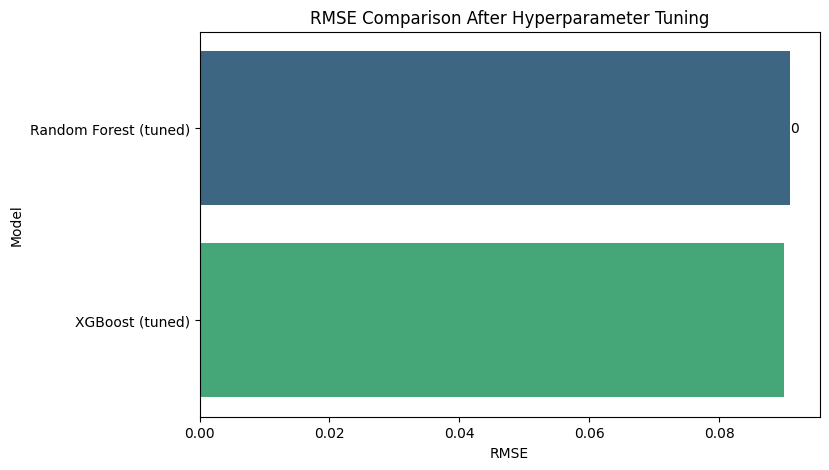

In [382]:
plt.figure(figsize=(8,5))
ax = sns.barplot(
    data=tuning_results,
    x="RMSE",
    y="Model",
    hue="Model",
    palette="viridis",
    legend=False
)
ax.bar_label(ax.containers[0], fmt="%.0f")
plt.title("RMSE Comparison After Hyperparameter Tuning")
plt.show()

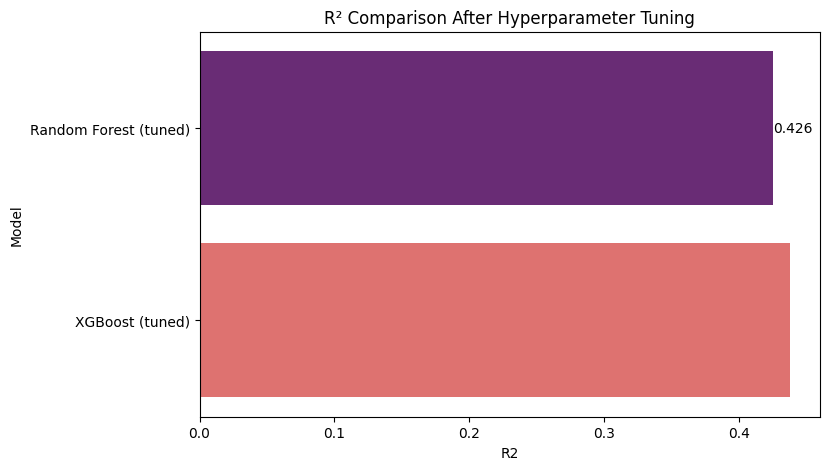

In [383]:
plt.figure(figsize=(8,5))
ax = sns.barplot(
    data=tuning_results,
    x="R2",
    y="Model",
    hue="Model",
    palette="magma",
    legend=False
)
ax.bar_label(ax.containers[0], fmt="%.3f")
plt.title("R² Comparison After Hyperparameter Tuning")
plt.show()

### Modeling Summary

After hyperparameter tuning, **XGBoost** slightly outperformed **Random Forest**.

It achieved a lower **RMSE** and a higher **R²** score, which means it makes more accurate predictions and explains more variance in wine quality. This confirms that boosting-based models handle the complexity of the dataset better than bagging-based models like **Random Forest**.